#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?

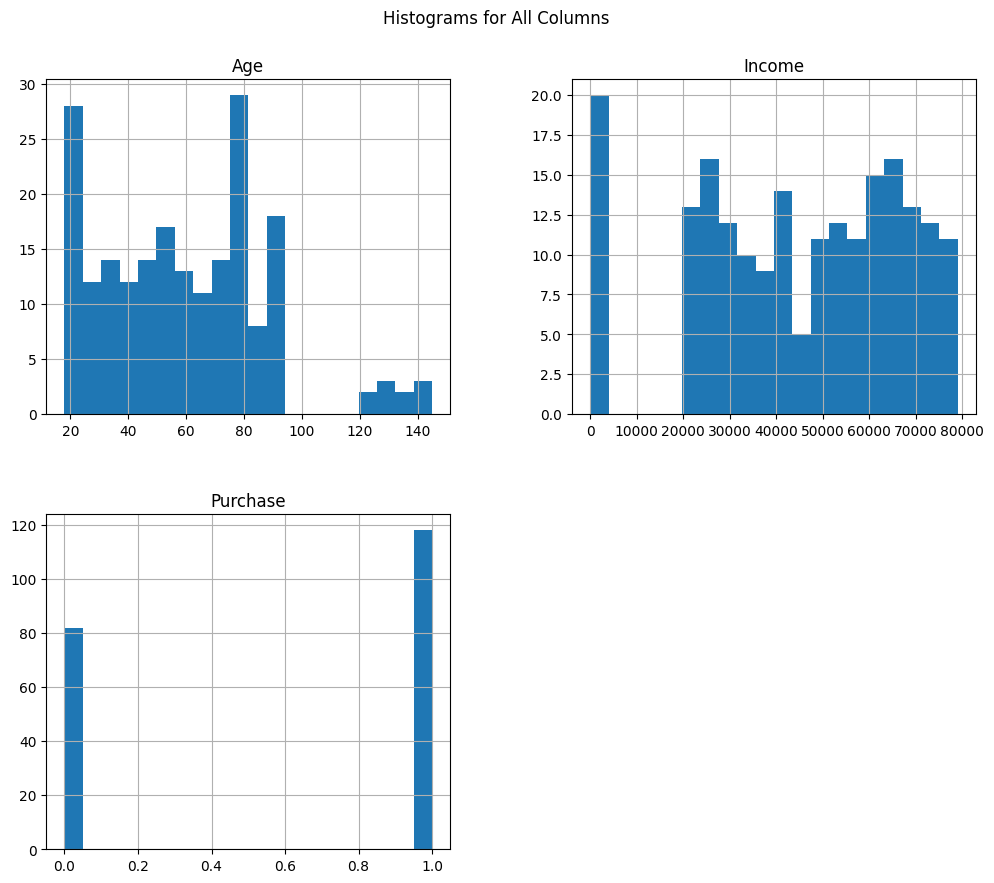

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/NCodeS5/707-lecture-master/main/3-week3/data/sample_data_with_outliers.csv')
df.head()


df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms for All Columns', y=0.95)
plt.show()

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Logistic Regression without Scaling - Test Accuracy: 0.72


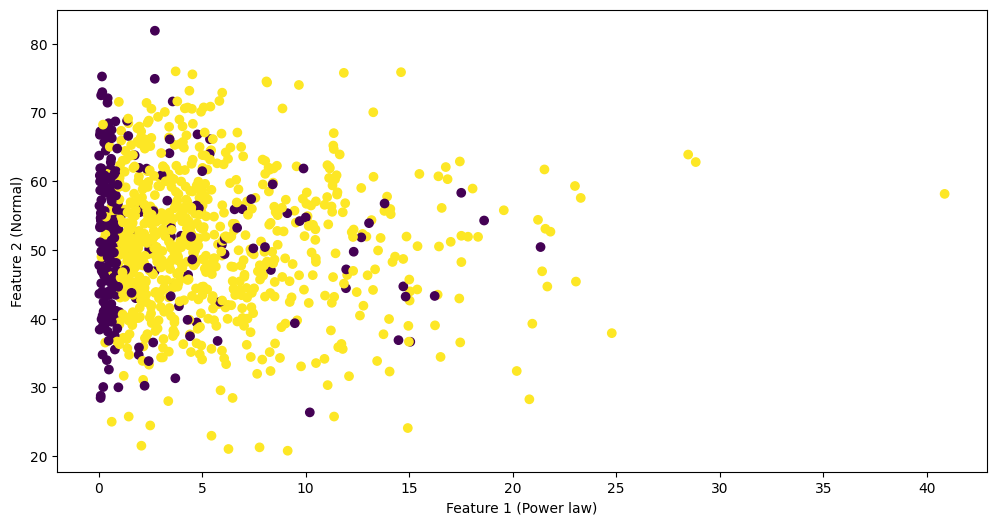

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


Logistic Regression without Scaling - Test Accuracy: 0.72


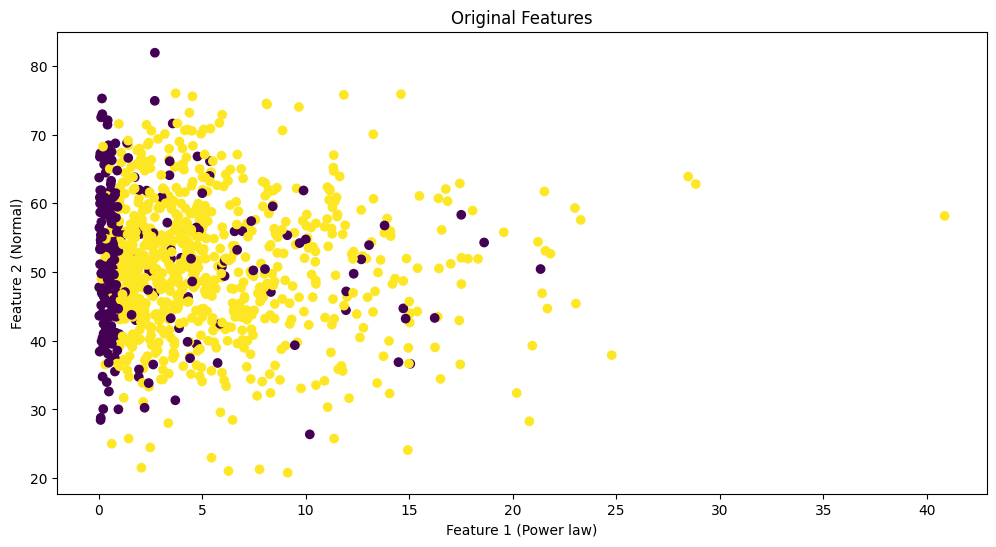

Logistic Regression with StandardScaler - Test Accuracy: 0.72
Logistic Regression with Log transform - Test Accuracy: 0.89


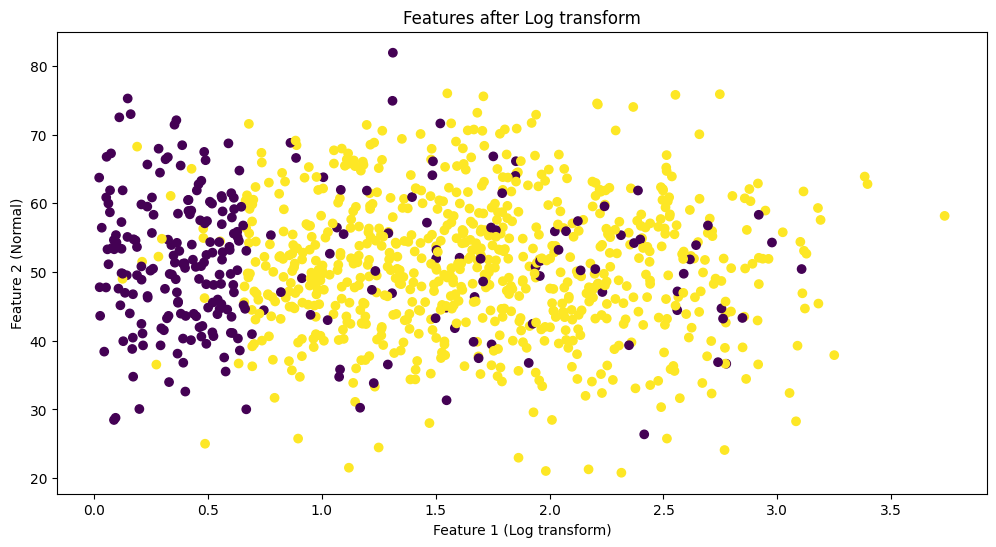

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]

# Combine features into a single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.title('Original Features')
plt.show()

# 1. Scaling the exponential feature using StandardScaler
# Logistic Regression with StandardScaler
lr_standard = LogisticRegression(max_iter=1000)
lr_standard.fit(X_scaled_standard, y)

# Reshape X_train[:, :1] and X_test[:, :1] before fitting and scoring
X_train_scaled_standard = scaler_standard.transform(X_train[:, :1].reshape(-1, 1))
X_test_scaled_standard = scaler_standard.transform(X_test[:, :1].reshape(-1, 1))

lr_standard.fit(X_train_scaled_standard, y_train)
print(f"Logistic Regression with StandardScaler - Test Accuracy: {lr_standard.score(X_test_scaled_standard, y_test):.2f}")


# 2. Scaling the exponential feature using Log transform
X_log_transformed = X.copy()
X_log_transformed[:, 0] = np.log1p(X[:, 0])

# Logistic Regression with Log transform
lr_log_transform = LogisticRegression(max_iter=1000)
lr_log_transform.fit(X_log_transformed, y)

print(f"Logistic Regression with Log transform - Test Accuracy: {lr_log_transform.score(X_log_transformed, y):.2f}")

# Plot features after Log transform
plt.figure(figsize=(12, 6))
plt.scatter(X_log_transformed[:, 0], X_log_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Log transform)')
plt.ylabel('Feature 2 (Normal)')
plt.title('Features after Log transform')
plt.show()


#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/NCodeS5/707-lecture-master/main/2-week2/data/titanic.csv"  # Replace with the actual link
titanic_data = pd.read_csv(url)

# Select relevant columns
columns_to_keep = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'survived']
titanic_subset = titanic_data[columns_to_keep]

# Encode categorical variables
label_encoder = LabelEncoder()
titanic_subset['sex'] = label_encoder.fit_transform(titanic_subset['sex'])

# Split the dataset into training and testing sets
X = titanic_subset.drop('age', axis=1)
y = titanic_subset['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to handle missing values and train a classifier
def train_classifier_with_imputer(imputer, classifier):
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    classifier.fit(X_train_imputed, y_train)
    y_pred = classifier.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Methods to handle missing values
methods = ['ffill', 'mean', 'most_frequent', KNNImputer()]

# Classifiers to test
classifiers = [DecisionTreeClassifier(), LogisticRegression(), SGDClassifier()]

# Iterate through methods and classifiers
for method in methods:
    for classifier in classifiers:
        if method == KNNImputer():
            imputer = KNNImputer(n_neighbors=5)  # For KNN imputer
        else:
            imputer = SimpleImputer(strategy=method)

        accuracy = train_classifier_with_imputer(imputer, classifier)
        print(f"Method: {method}, Classifier: {classifier.__class__.__name__}, Accuracy: {accuracy:.2f}")


<ipython-input-9-9cb1a72e1f3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_subset['sex'] = label_encoder.fit_transform(titanic_subset['sex'])


InvalidParameterError: The 'strategy' parameter of SimpleImputer must be a str among {'mean', 'constant', 'median', 'most_frequent'}. Got 'ffill' instead.

#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data.

In [8]:
import pandas as pd

sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10, 2, 3, 1, 6, 9]
})

# One-hot encode 'color' and 'target' columns
one_hot_encoded = pd.get_dummies(sample, columns=['color', 'target'])

# Concatenate the original DataFrame with the one-hot encoded columns
result = pd.concat([sample, one_hot_encoded], axis=1)

# Display the result
print(result)


   color target  yumminess  yumminess  color_blue  color_green  color_red  \
0    red  apple         10         10           0            0          1   
1   blue    sky          2          2           1            0          0   
2  green  grass          3          3           0            1          0   
3    red    sky          1          1           0            0          1   
4   blue   moon          6          6           1            0          0   
5  green  apple          9          9           0            1          0   

   target_apple  target_grass  target_moon  target_sky  
0             1             0            0           0  
1             0             0            0           1  
2             0             1            0           0  
3             0             0            0           1  
4             0             0            1           0  
5             1             0            0           0  


#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient.
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet.
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Compare your results with and without re-balancing your classes.
3. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.